                                 Car ID          Model  Color Temperature  \
0  137b948a-c99f-4afa-a2a7-9ef65ae51e8f  Model 5, 2022   Blue    110.3 °C   
1  3395a182-7e76-4fb3-94ba-5163d8f4e6b0  Model 3, 2022  Black    110.4 °C   
2  8c6a8e5b-d869-4665-b739-819c9e4a2070  Model 3, 2022   Grey    110.3 °C   
3  ff864366-fe5e-409e-9b2f-8fe440d8cc5b  Model 3, 2022  Black    110.4 °C   
4  10484506-1be0-4a86-8dbc-b8b2092b93b2  Model 3, 2022  White    230.7 °C   

    RPM           Factory   Usage  Fuel consumption Membership  Failure A  \
0  1551  Shang Hai, China  Medium             659.7     Normal          0   
1  1408  Shang Hai, China  Medium             705.3    Premium          1   
2  1498  Shang Hai, China     Low             670.7    Premium          0   
3  1433   Berlin, Germany    High             630.6    Premium          1   
4  1408     New York, U.S    High             660.9     Normal          0   

   Failure B  Failure C  Failure D  Failure E  Failure  
0          0     

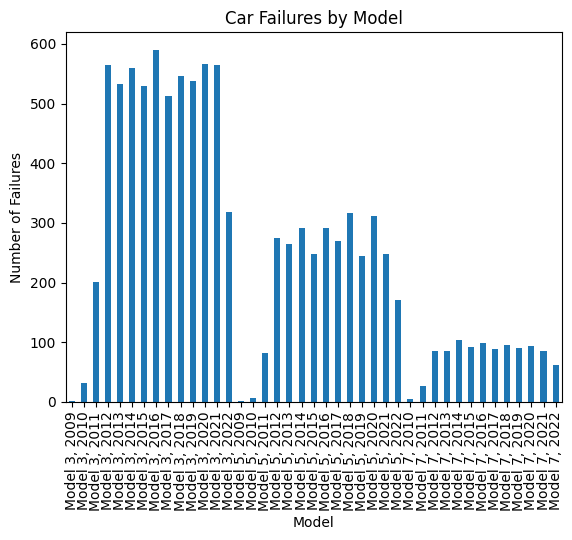

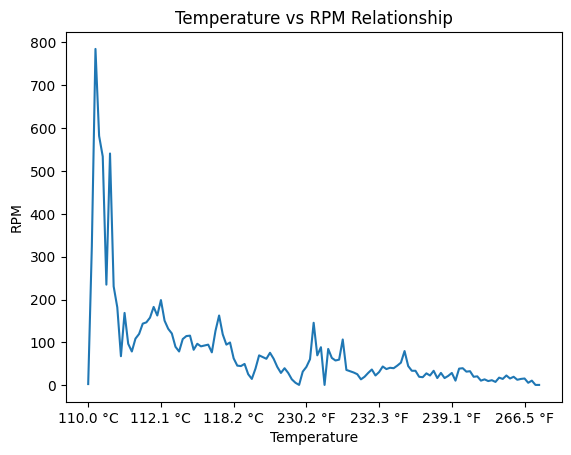

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

# Connect to the database and read data from the table into a DataFrame
conn = sqlite3.connect("C:\\Users\\Jianw\\Documents\\GitHub\\aiap13-liaw-jian-wei-026z\\data aiap13\\failure.db")
data = pd.read_sql_query("SELECT * FROM Failure", conn)

#for failure columns one-hot encoding to convert the variable into numerical form 
data = pd.get_dummies(data, columns=["Failure"])

# Use the head() method to display the first few rows of the data
print(data.head())

# Use the describe() method to get summary statistics of the data
print(data.describe())

# Use the info() method to get information about the data
print(data.info())

# Use the groupby() method to group the data by the 'Model' column
make_group = data.groupby('Model')

# Use the size() method to get the number of failures for each make
make_failures = make_group.size()

# Use the plot() method to create a bar chart of the number of failures by make
make_failures.plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Number of Failures')
plt.title('Car Failures by Model')
plt.show()

# Use the groupby() method to group the data by the 'Temperature' column
temp_group = data.groupby('Temperature')

# Use the size() method to get the number of failures for each year
temp_failures = temp_group.size()

# Use the plot() method to create a line chart of the number of failures by year
temp_failures.plot(kind='line')
plt.xlabel('Temperature')
plt.ylabel('RPM')
plt.title('Temperature vs RPM Relationship')
plt.show()

